In [66]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
#from catboost import CatBoostClassifier

from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


In [67]:
data = pd.read_csv("/home/gsunilmadhusudanreddy/Training/Faurd Detection/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
count_classes = pd.value_counts(data['Class'], sort = False)
count_classes

0    284315
1       492
Name: Class, dtype: int64

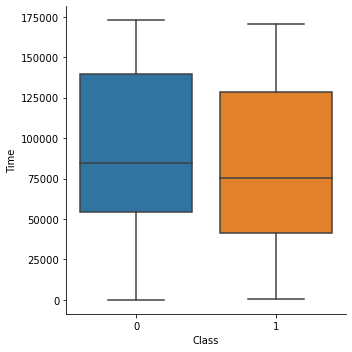

In [69]:
sns.catplot(data=data, x="Class", y="Time", kind="box")

In [70]:
def missing_percentage(df):
    total_missing = df.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = df[missing_cols].dtypes.values

    per = round((missing_values/len(df))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)

    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """

In [71]:
def show_distribution(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=df, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=df, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')

In [72]:
def show_outliers_accordingTo_target(data_frame, numeric_cols, target_col):
    plt.figure(figsize=(20, 20))
    for i in range(len(numeric_cols)):
        plt.subplot(8,4, i+1)
        sns.scatterplot(data=data_frame, x=numeric_cols[i], y=target_col, color=generate_colors(1))
        plt.title(f'{numeric_cols[i].title()} According to the Target')
        plt.subplots_adjust(hspace = 0.7, wspace=0.5)

In [73]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype


In [74]:
data.columns = data.columns.str.lower()

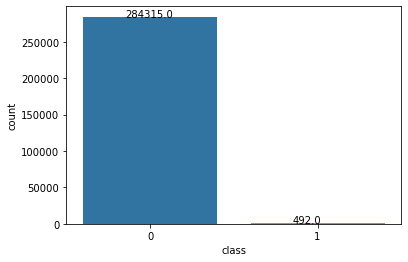

In [75]:
ax = sns.countplot(x="class", data=data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


sc.fit(X)
X_std = sc.transform(X)

In [76]:
train, test = train_test_split(data, test_size=0.3, random_state=42, stratify= data["class"])
print(train.shape)
print(test.shape)

(199364, 31)
(85443, 31)


In [77]:
from pca import pca
x = train.drop('class', axis=1)

In [78]:
x.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

In [79]:
model = pca(normalize=True)
out = model.fit_transform(x)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [27] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[27]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [80]:
out.keys()

dict_keys(['loadings', 'PC', 'explained_var', 'variance_ratio', 'model', 'scaler', 'pcp', 'topfeat', 'outliers', 'outliers_params'])

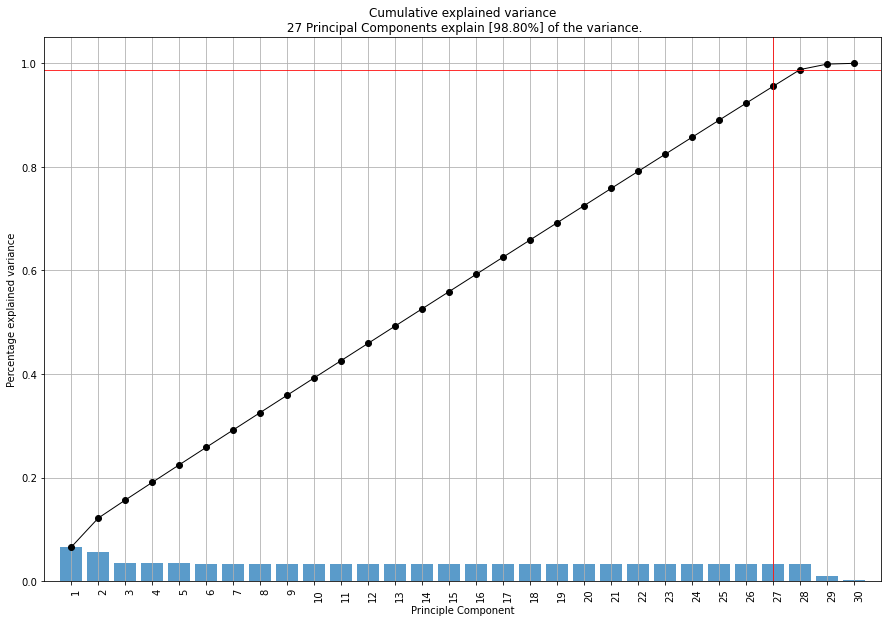

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 27 Principal Components explain [98.80%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [81]:
model.plot()

In [82]:
# Best 27 features according to pca
pca_df = pd.DataFrame(out['topfeat'])
before_scale = pca_df[pca_df['type']=='best'].feature.values
before_scale

array(['amount', 'time', 'v20', 'v1', 'v12', 'v8', 'v26', 'v8', 'v8',
       'v18', 'v21', 'v13', 'v25', 'v9', 'v17', 'v15', 'v12', 'v14',
       'v19', 'v17', 'v16', 'v4', 'v1', 'v6', 'v5', 'v8', 'v10'],
      dtype=object)

In [83]:
pca_df

,PC,feature,loading,type
0,PC1,amount,0.705409,best
1,PC2,time,0.707157,best
2,PC3,v20,-0.558377,best
3,PC4,v1,-0.464342,best
4,PC5,v12,-0.410990,best
5,PC6,v8,-0.467378,best
6,PC7,v26,-0.493196,best
7,PC8,v8,0.369271,best
8,PC9,v8,-0.412119,best
9,PC10,v18,0.505184,best


In [84]:
col_name = train.columns
col_name

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [85]:
# Let's now try scalling and apply pca once time to see if it will change or not
# I will use robust scaler because of outliers
x = train.drop('class', axis=1)
y = train['class']

rs = RobustScaler()
x = rs.fit_transform(x)

In [86]:
x= pd.DataFrame(x, columns=col_name[:-1])
x.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,0.820038,-0.013258,0.457338,-0.008888,-0.462488,0.495620,-0.325006,0.714944,-0.045992,-0.108169,...,0.070669,-0.487382,-0.540678,0.171804,-0.506273,-0.765995,0.342963,1.449661,0.552631,-0.207017
1,0.642447,0.786899,-0.177339,-1.243910,0.762207,0.513624,-0.635958,0.781312,-0.766521,-0.216077,...,0.093557,0.747736,0.488919,-0.715134,-0.482616,0.713481,-0.661569,-0.473392,-0.518549,1.781985
2,-0.177033,-0.492609,-3.205580,-0.824190,0.308390,-1.551221,-0.421529,1.387841,-1.367367,-0.998296,...,6.531339,0.905019,-1.344212,-3.505107,0.585339,-0.234616,1.624359,-1.967544,1.650955,17.826674
3,-0.427352,-0.240002,0.683433,-0.414727,-0.477866,1.941030,3.090688,0.005005,1.440514,-0.219439,...,0.837177,-0.395127,-0.667624,0.504138,1.137301,-1.205636,0.162145,0.058323,1.852793,-0.243770
4,0.522898,-0.294401,0.105010,0.053717,-1.110251,2.049579,3.681433,-0.212831,1.707288,0.422861,...,0.629375,0.474843,0.702918,-1.002743,0.915346,-0.150734,1.171259,0.449082,-0.340076,-0.243770


In [87]:
train = train.reset_index(drop=True)
train.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,154640.0,-0.012102,0.707332,0.163334,-0.756498,0.590999,-0.653429,0.844608,-0.001672,-0.184399,...,-0.231385,-0.572415,0.042660,-0.360882,-0.494703,0.142657,0.235922,0.083758,7.13,0
1,139525.0,1.776151,-0.184642,-2.204096,1.191668,0.614461,-1.016525,0.919254,-0.387465,-0.318277,...,0.281190,0.530070,-0.232262,-0.342096,0.492355,-0.427682,-0.075228,-0.056755,150.00,0
2,69778.0,-1.083391,-4.440527,-1.399530,0.469764,-2.076458,-0.766137,1.601441,-0.709176,-1.288745,...,0.346463,-1.432833,-1.097063,0.505926,-0.140185,0.870190,-0.316982,0.227833,1302.49,0
3,48473.0,-0.518847,1.025087,-0.614624,-0.780959,2.474666,3.335055,0.046111,0.794249,-0.322448,...,-0.193099,-0.708348,0.145672,0.944217,-0.788017,0.039995,0.010804,0.254309,4.49,0
4,129350.0,-0.640421,0.212171,0.283341,-1.786916,2.616127,4.024863,-0.198897,0.937087,0.474428,...,0.167939,0.759218,-0.321412,0.767971,-0.084221,0.612936,0.074029,-0.033344,4.49,0


In [88]:
train.update(x)
train.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.820038,-0.013258,0.457338,-0.008888,-0.462488,0.495620,-0.325006,0.714944,-0.045992,-0.108169,...,-0.487382,-0.540678,0.171804,-0.506273,-0.765995,0.342963,1.449661,0.552631,-0.207017,0
1,0.642447,0.786899,-0.177339,-1.243910,0.762207,0.513624,-0.635958,0.781312,-0.766521,-0.216077,...,0.747736,0.488919,-0.715134,-0.482616,0.713481,-0.661569,-0.473392,-0.518549,1.781985,0
2,-0.177033,-0.492609,-3.205580,-0.824190,0.308390,-1.551221,-0.421529,1.387841,-1.367367,-0.998296,...,0.905019,-1.344212,-3.505107,0.585339,-0.234616,1.624359,-1.967544,1.650955,17.826674,0
3,-0.427352,-0.240002,0.683433,-0.414727,-0.477866,1.941030,3.090688,0.005005,1.440514,-0.219439,...,-0.395127,-0.667624,0.504138,1.137301,-1.205636,0.162145,0.058323,1.852793,-0.243770,0
4,0.522898,-0.294401,0.105010,0.053717,-1.110251,2.049579,3.681433,-0.212831,1.707288,0.422861,...,0.474843,0.702918,-1.002743,0.915346,-0.150734,1.171259,0.449082,-0.340076,-0.243770,0


[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [27] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[27]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


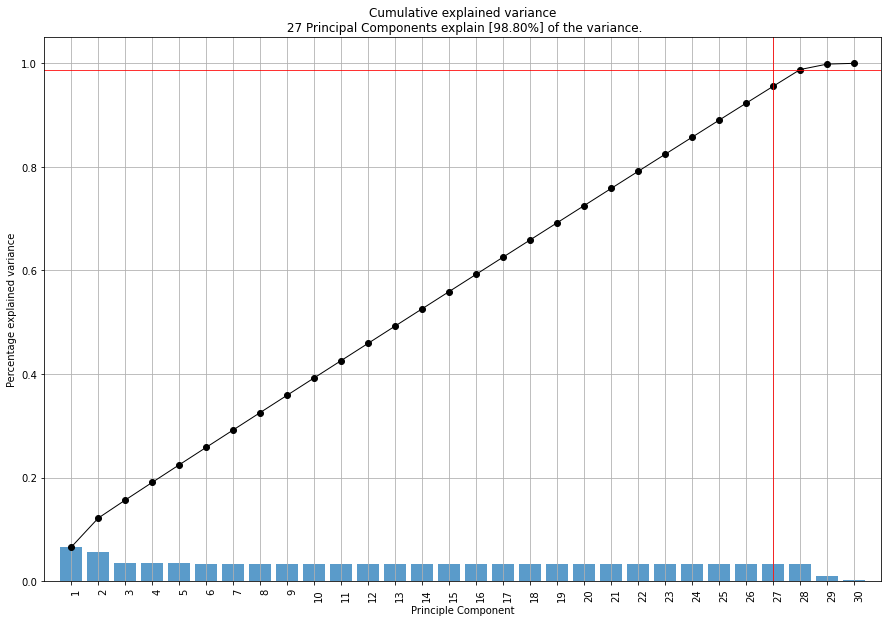

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 27 Principal Components explain [98.80%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [89]:
x = train.drop('class', axis=1)
# Reduce the data up to the number of components that explains 95% of the variance.
model = pca(normalize=True)
out = model.fit_transform(x)

model.plot()

In [90]:
# Best 27 features according to pca
pca_df = pd.DataFrame(out['topfeat'])
after_scale = pca_df[pca_df['type']=='best'].feature.values
after_scale

array(['amount', 'time', 'v20', 'v1', 'v12', 'v8', 'v26', 'v8', 'v8',
       'v18', 'v21', 'v13', 'v25', 'v9', 'v17', 'v15', 'v12', 'v14',
       'v19', 'v17', 'v16', 'v4', 'v1', 'v6', 'v5', 'v8', 'v10'],
      dtype=object)

In [91]:
set(after_scale)-set(before_scale)

set()

In [92]:
len(after_scale), len(set(after_scale))

(27, 21)

In [93]:
final_train = pd.concat([train[set(after_scale)], train['class']], axis=1)
final_train

/tmp/ipykernel_10079/1823580294.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  final_train = pd.concat([train[set(after_scale)], train['class']], axis=1)


,v4,v10,v9,v1,v17,v21,v12,v13,v19,v5,...,v20,v18,v14,v16,v26,v25,time,v6,v15,class
0,-0.462488,-0.130846,-0.108169,-0.013258,-0.761978,-0.487382,0.239838,-0.485224,0.356048,0.495620,...,0.070669,-0.064721,0.402126,0.162966,0.342963,-0.765995,0.820038,-0.325006,-0.858495,0
1,0.762207,0.616009,-0.216077,0.786899,-0.741636,0.747736,0.104804,-0.794783,-0.022517,0.513624,...,0.093557,0.332405,1.300607,-0.203207,-0.661569,0.713481,0.642447,-0.635958,-0.391275,0
2,0.308390,0.181264,-0.998296,-0.492609,0.141255,0.905019,0.049477,0.810282,-1.194471,-1.551221,...,6.531339,0.920547,0.405214,-1.394877,1.624359,-0.234616,-0.177033,-0.421529,0.613149,0
3,-0.477866,0.223632,-0.219439,-0.240002,-0.265325,-0.395127,-0.471395,0.014405,1.012764,1.941030,...,0.837177,0.407887,-0.366213,0.337714,0.162145,-1.205636,-0.427352,3.090688,1.083901,0
4,-1.110251,-0.192413,0.422861,-0.294401,-0.729785,0.474843,-0.313537,-0.183276,-0.505947,2.049579,...,0.629375,0.010921,-0.476655,-0.016659,1.171259,-0.150734,0.522898,3.681433,0.296012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199359,-1.312233,-0.915478,0.414032,-0.193545,-0.812259,0.390377,1.151941,0.240214,0.112345,0.185668,...,0.400450,0.397243,0.122938,-0.543974,-1.443594,0.031506,-0.962370,-0.862979,0.039756,0
199360,0.094703,0.308678,0.843178,0.884315,-0.951575,0.702763,0.433513,-0.180866,0.043393,-0.176665,...,-0.322965,0.744236,0.014504,0.625964,1.190038,-0.317383,0.738616,0.572895,-0.028799,0
199361,-0.002190,0.203699,0.405384,-0.678096,1.478593,-0.104412,0.227519,-0.396080,-1.363329,0.490785,...,-0.470962,-2.623557,-0.491205,-1.963923,0.556626,-0.662842,-0.282941,1.350485,0.586048,0
199362,0.959380,-0.038804,0.298134,0.470830,0.531921,-0.079205,0.297881,-0.406890,-0.552213,-0.249677,...,-0.251476,-1.030974,0.128288,-0.870089,-0.498611,0.864807,-0.582115,-0.082489,-0.099959,0


In [94]:
x = final_train.drop('class', axis=1)
y = final_train['class']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=42, test_size=0.25)
x_train.shape, x_valid.shape

((149523, 21), (49841, 21))

In [95]:
x_train.values

array([[ 0.62094537,  0.47890396, -0.21470112, ...,  0.35754968,
         0.15110839,  1.06921462],
       [-0.68179507,  1.52089296, -1.4993604 , ..., -0.31883564,
         0.0791429 , -0.56861855],
       [-1.30296011,  1.08511843, -0.63171559, ...,  0.8433139 ,
        -0.39435746, -0.08931309],
       ...,
       [-0.43326149,  0.00573635, -0.00400598, ...,  0.64687688,
         0.06952997, -0.01750826],
       [-1.91578881, -0.47838918,  0.82091822, ..., -0.56273994,
        -1.45496053,  0.23852175],
       [-0.51427334,  0.88283174, -0.2425738 , ..., -0.55640706,
         0.41822003,  0.69177461]])

In [96]:
sm = SMOTE(random_state=42)
x_train_res , y_train_res = sm.fit_resample(x_train.values, y_train.ravel())

ravel() in Python. The numpy module of Python provides a function called numpy. ravel, which is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array. The returned array has the same data type as the source array or input array.

In [97]:
y_train.ravel()

array([0, 0, 0, ..., 0, 0, 0])

(298510, 21)


/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

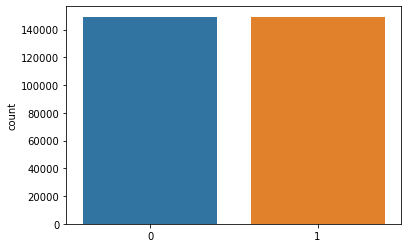

In [98]:
print(x_train_res.shape)

sns.countplot(y_train_res)

In [99]:
log_model = LogisticRegression()
log_model.fit(x_train_res, y_train_res)
y_pred = log_model.predict(x_valid)
    
print(f'Training Score : {log_model.score(x_train_res, y_train_res)}')
print(f'Validation Score : {log_model.score(x_valid, y_valid)}')
    
print(classification_report(y_valid, y_pred), end='\n\n')

/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Training Score : 0.9573515125121437
Validation Score : 0.9753817138500431
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     49765
           1       0.05      0.91      0.10        76

    accuracy                           0.98     49841
   macro avg       0.53      0.94      0.54     49841
weighted avg       1.00      0.98      0.99     49841




In [100]:
model = RandomForestClassifier()
model.fit(x_train_res, y_train_res)
y_pred = model.predict(x_valid)
 
print(f'Training Score : {model.score(x_train_res, y_train_res)}')
print(f'Validation Score : {model.score(x_valid, y_valid)}')
   
print(classification_report(y_valid, y_pred), end='\n\n')

/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Score : 1.0


/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Validation Score : 0.9996187877450292
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49765
           1       0.89      0.86      0.87        76

    accuracy                           1.00     49841
   macro avg       0.95      0.93      0.94     49841
weighted avg       1.00      1.00      1.00     49841




plt.figure(figsize=(20,5))
sorted_index = model.feature_importances_.argsort()
print(f'Sorted Index : {sorted_index}')
sns.barplot(x_train.columns[sorted_index], model.feature_importances_[sorted_index], palette=generate_colors(1))
plt.title('Feature Importance')

In [101]:
for i in [8, 15, 22]:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_valid)
    
    print(f'Training Score : {model.score(x_train_res, y_train_res)}')
    print(f'Validation Score : {model.score(x_valid, y_valid)}')
    
    print(classification_report(y_valid, y_pred), end='\n\n')

/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Training Score : 0.9873840072359384
Validation Score : 0.9842900423346241
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     49765
           1       0.08      0.86      0.14        76

    accuracy                           0.98     49841
   macro avg       0.54      0.92      0.57     49841
weighted avg       1.00      0.98      0.99     49841




/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Training Score : 0.9985394124149944
Validation Score : 0.9948436026564476
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49765
           1       0.21      0.86      0.34        76

    accuracy                           0.99     49841
   macro avg       0.60      0.93      0.67     49841
weighted avg       1.00      0.99      1.00     49841


Training Score : 0.9995511038156175
Validation Score : 0.9964286430850103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49765
           1       0.28      0.86      0.42        76

    accuracy                           1.00     49841
   macro avg       0.64      0.93      0.71     49841
weighted avg       1.00      1.00      1.00     49841




/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [102]:
model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50), n_estimators=4)
model.fit(x_train_res, y_train_res)
y_pred = model.predict(x_valid)
    
print(f'Training Score : {model.score(x_train_res, y_train_res)}')
print(f'Validation Score : {model.score(x_valid, y_valid)}')
    
print(classification_report(y_valid, y_pred), end='\n\n')

/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Training Score : 1.0


/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Validation Score : 0.999598723942136
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49765
           1       0.87      0.87      0.87        76

    accuracy                           1.00     49841
   macro avg       0.93      0.93      0.93     49841
weighted avg       1.00      1.00      1.00     49841




In [103]:
from catboost import CatBoostClassifier

In [104]:
model = CatBoostClassifier(iterations=50)
model.fit(x_train_res, y_train_res)
y_pred = model.predict(x_valid)

Learning rate set to 0.5
0:	learn: 0.1763635	total: 72.7ms	remaining: 3.56s
1:	learn: 0.1061323	total: 127ms	remaining: 3.05s
2:	learn: 0.0861828	total: 217ms	remaining: 3.4s
3:	learn: 0.0773888	total: 299ms	remaining: 3.44s
4:	learn: 0.0675539	total: 373ms	remaining: 3.36s
5:	learn: 0.0585174	total: 466ms	remaining: 3.42s
6:	learn: 0.0492163	total: 552ms	remaining: 3.39s
7:	learn: 0.0450783	total: 642ms	remaining: 3.37s
8:	learn: 0.0390607	total: 729ms	remaining: 3.32s
9:	learn: 0.0356681	total: 815ms	remaining: 3.26s
10:	learn: 0.0318126	total: 899ms	remaining: 3.19s
11:	learn: 0.0295963	total: 977ms	remaining: 3.09s
12:	learn: 0.0265564	total: 1.06s	remaining: 3.01s
13:	learn: 0.0253412	total: 1.14s	remaining: 2.93s
14:	learn: 0.0225255	total: 1.22s	remaining: 2.85s
15:	learn: 0.0211195	total: 1.31s	remaining: 2.77s
16:	learn: 0.0191876	total: 1.37s	remaining: 2.66s
17:	learn: 0.0180613	total: 1.46s	remaining: 2.6s
18:	learn: 0.0169621	total: 1.56s	remaining: 2.54s
19:	learn: 0.0163

In [105]:
print(f'Training Score : {model.score(x_train_res, y_train_res)}')
print(f'Validation Score : {model.score(x_valid, y_valid)}')
    
print(classification_report(y_valid, y_pred), end='\n\n')

Training Score : 0.9992730561790225
Validation Score : 0.9976525350614955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49765
           1       0.38      0.89      0.54        76

    accuracy                           1.00     49841
   macro avg       0.69      0.95      0.77     49841
weighted avg       1.00      1.00      1.00     49841




In [106]:
para_grid = { 
    'n_estimators': [10, 50, 100, 200],
    'max_depth' : [4,5,6,7],
}

In [107]:
#para_grid=[
#    {'n_estimators':[10,50],'max_features':[5, 10, 15]}
# ]

#randomForest_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=para_grid, cv=5, scoring='f1')
#randomForest_model.fit(x_train_res, y_train_res)

In [108]:
randomForest_model.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [109]:
modelRF = RandomForestClassifier(max_depth=7, n_estimators=100)
modelRF.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=7)

In [110]:
y_pred = modelRF.predict(x_valid)
print(f'Training Score : {model.score(x_train_res, y_train_res)}')
print(f'Validation Score : {model.score(x_valid, y_valid)}')
print(classification_report(y_valid, y_pred), end='\n\n')

/home/gsunilmadhusudanreddy/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training Score : 0.9992730561790225
Validation Score : 0.9976525350614955
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     49765
           1       0.22      0.93      0.35        76

    accuracy                           0.99     49841
   macro avg       0.61      0.96      0.67     49841
weighted avg       1.00      0.99      1.00     49841


